In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,accuracy_score , confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#load dataset file 
data = pd.read_csv("Tumor Cancer Prediction_Data.csv")
X = data.iloc[:,1:31]
Y = data.iloc[:,31]
data.isnull().sum()


Index        0
F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
F23          0
F24          0
F25          0
F26          0
F27          0
F28          0
F29          0
F30          0
diagnosis    0
dtype: int64

In [ ]:
#checking if there any duplication 
checking=data.duplicated()
print(checking)

0      False
1      False
2      False
3      False
4      False
       ...  
450    False
451    False
452    False
453    False
454    False
Length: 455, dtype: bool


In [ ]:
#Cleaning Data From Null and duplicated Values if there 
ff=data.dropna(inplace=True)
ff=data.drop_duplicates(inplace=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


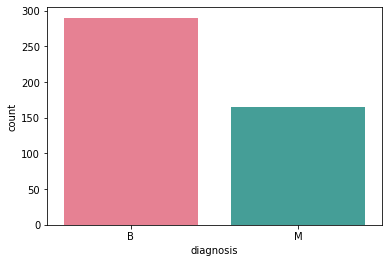

In [ ]:
sns.countplot(data['diagnosis'],palette='husl')

In [ ]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(Y)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 0 0]


In [ ]:
corr = X.corr()

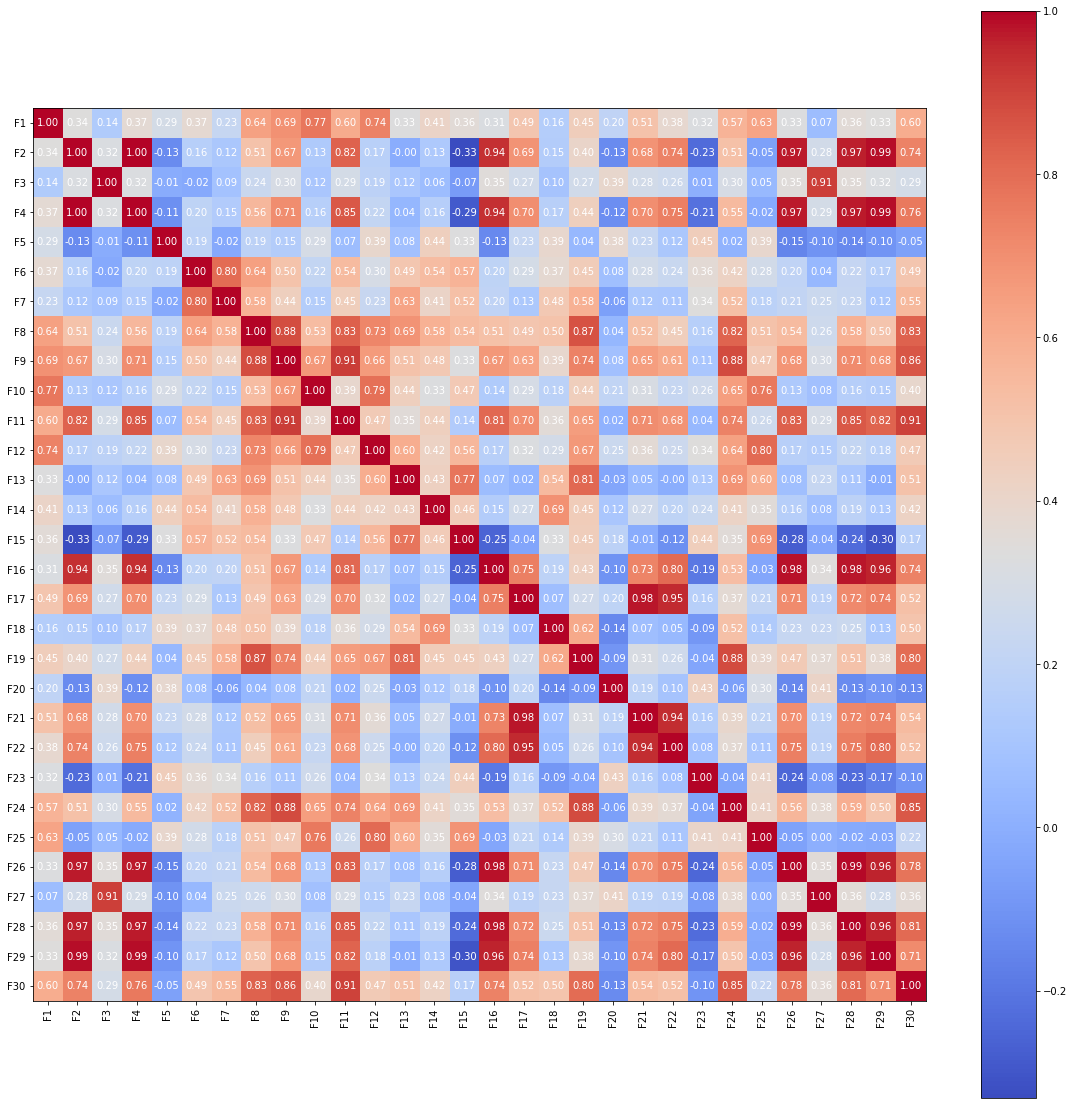

In [ ]:
plt.imshow(corr,cmap='coolwarm',interpolation='none')
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
plt.yticks(range(len(X.columns)),X.columns)
plt.gcf().set_size_inches(20,20)
labels=corr.values
for y in range(labels.shape[0]):
  for x in range (labels.shape[1]):
    plt.text(x,y,'{:.2f}'.format(labels[x,y]), ha = 'center',va='center',color='white')

In [ ]:
columns = np.full((corr.shape[0]),True, dtype=bool)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
          columns[j] = False
selected_columns = X.columns[columns]
X = X[selected_columns]
print(selected_columns)


Index(['F1', 'F2', 'F3', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F12', 'F13',
       'F14', 'F15', 'F17', 'F18', 'F19', 'F20', 'F23', 'F24', 'F25'],
      dtype='object')


In [ ]:
scaler = MinMaxScaler(copy = False, feature_range=(0,1))
scaler.fit(X)
scaler.transform(X)


array([[0.1523584 , 0.1452506 , 0.32448133, ..., 0.28172272, 0.08426518,
        0.06506087],
       [0.19795416, 0.18074684, 0.50912863, ..., 0.22343526, 0.15391374,
        0.06202065],
       [0.16569426, 0.43348005, 0.21369295, ..., 0.10385345, 0.18450479,
        0.02508879],
       ...,
       [0.12436067, 0.11619102, 0.35726141, ..., 0.23698941, 0.0913738 ,
        0.06281525],
       [0.        , 0.12963226, 0.35311203, ..., 0.        , 0.        ,
        0.02740351],
       [0.24000758, 0.21434995, 0.59004149, ..., 0.30008789, 0.2899361 ,
        0.13277504]])

In [ ]:
#splitting data into training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=100)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(364, 20) (91, 20) (364,) (91,)


In [ ]:
#KNN model
neighbors = np.arange(1, 10)   
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)



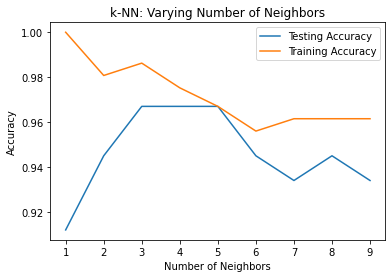

In [ ]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()





In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)
accuracy=knn.score(X_test, y_test)
print("accuracy:",accuracy)

accuracy: 0.967032967032967


In [ ]:
#model 1 SVM
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
Y_predict = classifier.predict(X_test)
print("accuracy:",metrics.accuracy_score(y_test, Y_predict))

accuracy: 0.9560439560439561


In [ ]:
#model 2 DECISION TREE
D_T = DecisionTreeClassifier(random_state=100)
D_T = D_T.fit(X_train,y_train)
y_pred = D_T.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9010989010989011


In [ ]:
#standardize the range of functionality of the input dataset
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
#model 3 LOGISTIC REGRESSION 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction=logreg.predict(X_test)

In [ ]:
acc=accuracy_score(y_test,prediction)
print("accuracy: ",acc)

accuracy:  0.967032967032967
